Este notebook es para validar visualmente que los datos PIB son correctos.

In [1]:
import pandas as pd
import os
from typing import List, Sequence, Optional
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.formula.api import ols
import re
from backend.cuentas_nacionales.pib import PIBViews
from backend.cuentas_nacionales.pib.pib_constantes import ConstantesPIB as C
from backend.political_terms import tag_politics
from backend.plots import plot_timeseries_bars, plot_bar_subplots_by_administration

In [2]:
g = lambda x: x.map(lambda x:x if type(x) == str else '{:,.2f}'.format(x))

year_on_year_changes = lambda df, q: (df.pct_change(q) * 100).dropna()

In [3]:
# pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [4]:
folder = r'C:\Users\adolj\OneDrive\Documentos\APPS\informed_economist\data\raw'
file_name = 'Variables_PIB_TC.xlsx'
input_path = os.path.join(folder, file_name)
dic_0 = pd.read_excel(input_path, sheet_name = None)

# datos en niveles (millones de colones)
quarterly_data_levels_TC = dic_0['pibQ'].copy()
quarterly_data_levels_TC.set_index('fecha', inplace = True)

# objeto PIBViews sobre datos en niveles
tipo = '_TC'
ob_pibv = PIBViews(quarterly_data_levels_TC, series_type = tipo)

# objeto PIBViews sobre datos en tasas de crecimiento interanual
yoy_df = round(year_on_year_changes(quarterly_data_levels_TC, 4), 2)
tipo = '_TC'
ob_pibv_yoy = PIBViews(yoy_df, series_type = tipo)

In [5]:
quarterly_data_levels_TC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139 entries, 1991-03-31 to 2025-09-30
Data columns (total 45 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   PIB_TC                                       139 non-null    float64
 1   PIB_Impuestos_TC                             139 non-null    float64
 2   PIB_Valor_Agregado_TC                        139 non-null    float64
 3   PIB_Agricultura_Silvicultura_Pesca_TC        139 non-null    float64
 4   PIB_Minas_Canteras_TC                        139 non-null    float64
 5   PIB_Manufactura_TC                           139 non-null    float64
 6   PIB_Electricidad_Agua_Saneamiento_TC         139 non-null    float64
 7   PIB_Construccion_TC                          139 non-null    float64
 8   PIB_Comercio_TC                              139 non-null    float64
 9   PIB_Transporte_Almacenamiento_TC             139 non-null

In [6]:
g(quarterly_data_levels_TC.head())

,PIB_TC,PIB_Impuestos_TC,PIB_Valor_Agregado_TC,PIB_Agricultura_Silvicultura_Pesca_TC,PIB_Minas_Canteras_TC,PIB_Manufactura_TC,PIB_Electricidad_Agua_Saneamiento_TC,PIB_Construccion_TC,PIB_Comercio_TC,PIB_Transporte_Almacenamiento_TC,PIB_Hoteles_Restaurantes_TC,PIB_Informacion_Comunicaciones_TC,PIB_Financieras_Seguros_TC,PIB_Inmobiliario_TC,PIB_Actividades_Profesionales_TC,PIB_Administracion_Publica_TC,PIB_Ense_Salud_Asistencia_Social_TC,PIB_Otras_Actividades_TC,PIB_Demanda_Interna_TC,PIB_Gasto_Consumo_Final_TC,PIB_Gasto_Consumo_Final_Hogares_TC,PIB_Bienes_Consumo_Duradero_TC,PIB_Bienes_Consumo_Semi_Duraderos_TC,PIB_Bienes_Consumo_No_Duraderos_TC,PIB_Servicios_TC,PIB_Gasto_Consumo_Final_Gobierno_General_TC,PIB_Formacion_Bruta_Capital_Fijo_TC,PIB_Maquinaria_Equipo_TC,PIB_Nuevas_Construcciones_TC,PIB_Exportaciones_Bienes_Servicios_TC,PIB_Exportaciones_Bienes_TC,PIB_Exportaciones_Servicios_TC,PIB_Exportacion_Bienes_RegDef_TC,PIB_Exportacion_Bienes_RegEsp_TC,PIB_Importaciones_Bienes_Servicios_TC,PIB_Importaciones_Bienes_TC,PIB_Importaciones_Servicios_TC,PIB_Importacion_Bienes_RegDef_TC,PIB_Importacion_Bienes_RegEsp_TC,PIB_Combustibles_TC,PIB_Sin_Combustibles_TC,PIB_RegDef_TC,PIB_RegEsp_TC,PIB_Terminos_Intercambio,PIB_USD
fecha,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991-03-31,"2,635,525.91","172,871.28","2,470,959.47","186,009.27","14,918.22","515,443.43","72,725.12","114,554.65","324,540.28","169,865.27","79,141.25","14,630.09","55,303.37","123,725.39","90,559.28","244,197.15","514,589.86","120,268.95","2,653,741.80","2,320,227.25","1,694,421.77","40,932.12","104,839.15","798,564.72","820,576.91","710,228.34","346,160.83","195,059.14","142,387.49","561,613.95","382,929.05","145,551.42","350,452.96","66,616.35","564,484.52","446,849.79","132,397.02","358,298.64","89,788.06","123,911.05","268,101.87","2,559,981.55","53,619.16",80.28,"1,934.18"
1991-06-30,"2,673,951.20","177,989.72","2,497,945.50","183,121.65","15,430.58","521,062.46","74,734.70","119,324.57","331,482.03","170,831.88","80,520.43","15,091.59","52,667.51","125,559.39","91,638.25","244,999.80","518,322.49","120,485.48","2,694,327.37","2,358,367.89","1,724,633.51","42,565.38","106,259.89","821,621.74","820,860.43","713,842.81","345,285.88","184,993.60","150,624.12","587,868.68","400,695.74","157,383.78","364,100.02","71,602.13","596,913.10","462,832.11","139,948.32","373,470.13","92,592.96","129,701.93","281,519.51","2,594,045.03","57,427.80",90.63,"1,740.47"
1991-09-30,"2,720,923.67","183,543.11","2,538,092.95","186,599.39","15,737.90","534,680.98","76,206.66","124,466.12","336,841.98","172,483.95","82,382.04","15,303.68","50,218.13","128,137.12","92,372.10","245,953.11","522,556.37","120,583.63","2,739,337.68","2,383,063.23","1,750,696.67","44,206.29","106,902.11","838,229.36","820,044.36","717,430.89","350,159.25","181,988.38","158,111.11","614,073.20","420,675.34","169,953.43","377,074.81","77,608.25","625,689.64","473,749.80","148,865.70","383,200.77","95,258.14","134,286.29","293,415.65","2,636,617.32","60,523.26",89.14,"1,709.24"
1991-12-31,"2,784,461.85","191,589.16","2,597,364.74","192,894.17","16,174.38","557,179.55","77,842.14","130,267.86","344,422.47","174,581.29","85,044.15","15,441.94","49,590.92","131,785.37","94,097.92","247,318.13","527,864.39","120,771.24","2,805,220.41","2,423,230.05","1,785,784.73","47,125.11","108,151.98","856,195.79","830,239.55","721,755.55","370,006.09","193,861.17","165,658.28","643,008.87","443,742.11","180,708.89","390,768.12","85,034.92","654,803.47","481,192.53","158,404.55","388,365.91","97,808.42","137,884.00","300,405.72","2,696,004.45","63,766.12",98.14,"1,831.83"
1992-03-31,"2,852,134.91","200,263.32","2,656,834.65","195,747.29","16,974.81","571,167.12","79,005.31","136,015.51","354,386.10","176,738.22","88,229.29","15,646.97","50,924.16","136,779.71","97,265.82","249,022.11","534,663.31","121,341.44","2,884,762.50","2,481,857.52","1,830,903.88","51,253.10","111,159.20","878,351.56","851,094.62","727,473.74","399,1

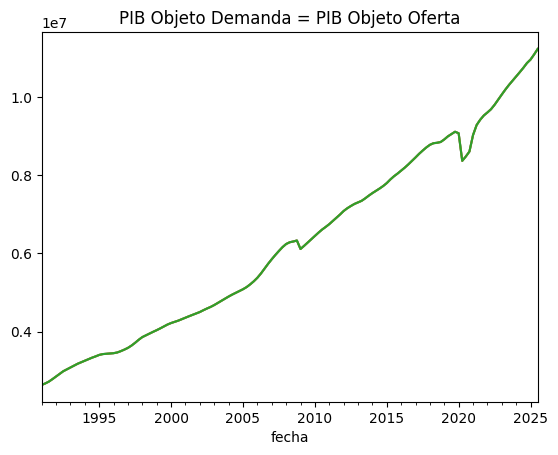

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139 entries, 1991-03-31 to 2025-09-30
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PIB_TC                 139 non-null    float64
 1   PIB_Valor_Agregado_TC  139 non-null    float64
 2   PIB_Impuestos_TC       139 non-null    float64
dtypes: float64(3)
memory usage: 4.3 KB


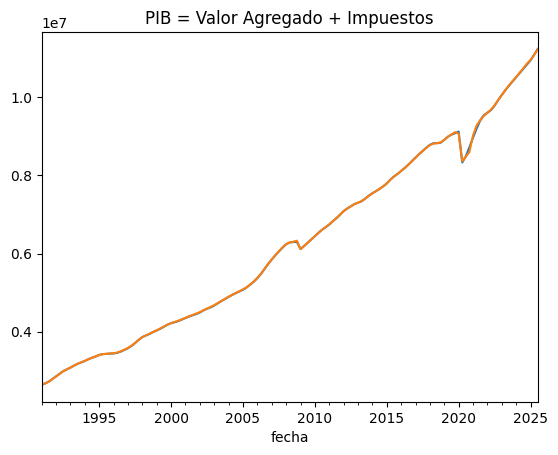

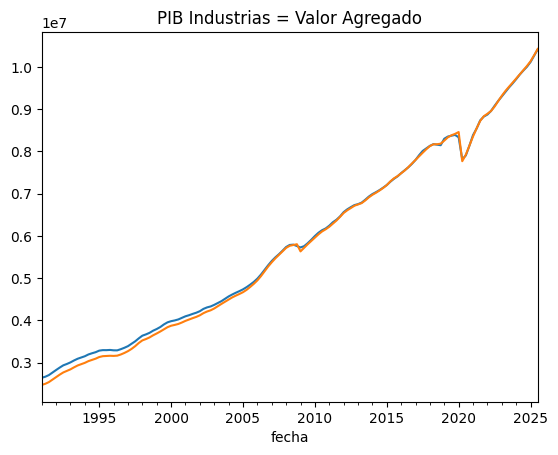

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139 entries, 1991-03-31 to 2025-09-30
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   PIB_Minas_Canteras_TC                 139 non-null    float64
 1   PIB_Manufactura_TC                    139 non-null    float64
 2   PIB_Electricidad_Agua_Saneamiento_TC  139 non-null    float64
 3   PIB_Construccion_TC                   139 non-null    float64
 4   Industria_Ampliada_TC                 139 non-null    float64
dtypes: float64(5)
memory usage: 6.5 KB


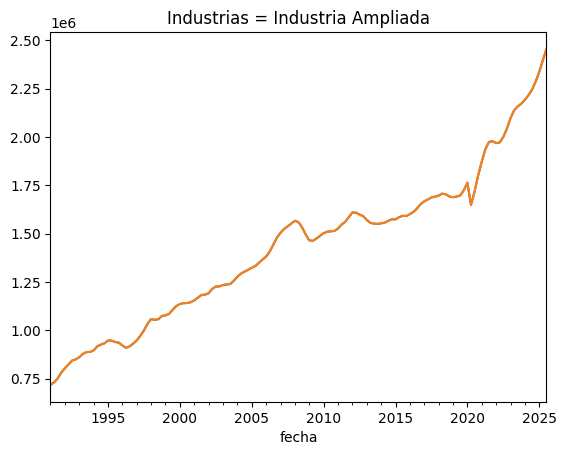

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139 entries, 1991-03-31 to 2025-09-30
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   PIB_Comercio_TC                      139 non-null    float64
 1   PIB_Transporte_Almacenamiento_TC     139 non-null    float64
 2   PIB_Hoteles_Restaurantes_TC          139 non-null    float64
 3   PIB_Informacion_Comunicaciones_TC    139 non-null    float64
 4   PIB_Financieras_Seguros_TC           139 non-null    float64
 5   PIB_Inmobiliario_TC                  139 non-null    float64
 6   PIB_Actividades_Profesionales_TC     139 non-null    float64
 7   PIB_Administracion_Publica_TC        139 non-null    float64
 8   PIB_Ense_Salud_Asistencia_Social_TC  139 non-null    float64
 9   PIB_Otras_Actividades_TC             139 non-null    float64
 10  Servicios_TC                         139 non-null    float64
dtypes: float64(11

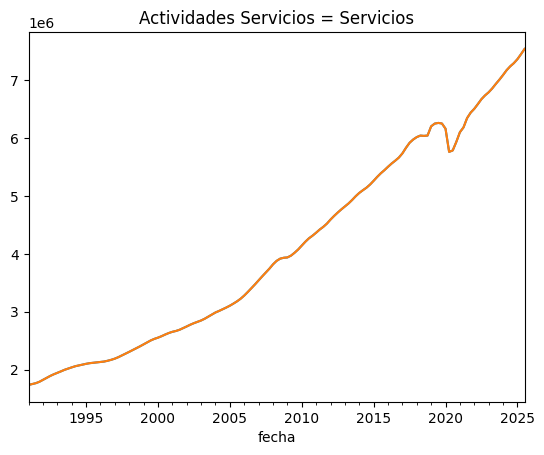

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139 entries, 1991-03-31 to 2025-09-30
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PIB_Importacion_Bienes_RegDef_TC  139 non-null    float64
 1   PIB_Combustibles_TC               139 non-null    float64
 2   PIB_Sin_Combustibles_TC           139 non-null    float64
dtypes: float64(3)
memory usage: 4.3 KB


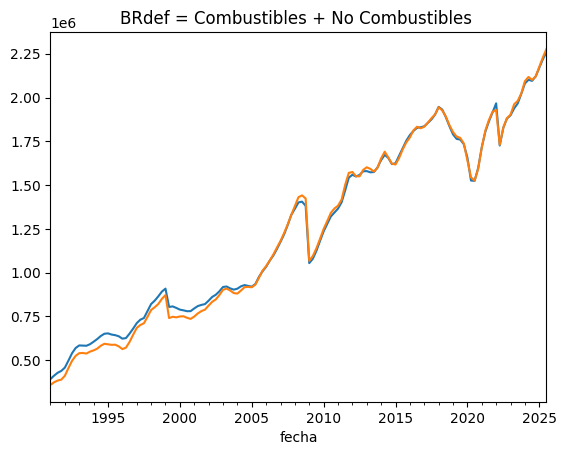

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139 entries, 1991-03-31 to 2025-09-30
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PIB_Importaciones_Bienes_TC       139 non-null    float64
 1   PIB_Importacion_Bienes_RegDef_TC  139 non-null    float64
 2   PIB_Importacion_Bienes_RegEsp_TC  139 non-null    float64
dtypes: float64(3)
memory usage: 4.3 KB


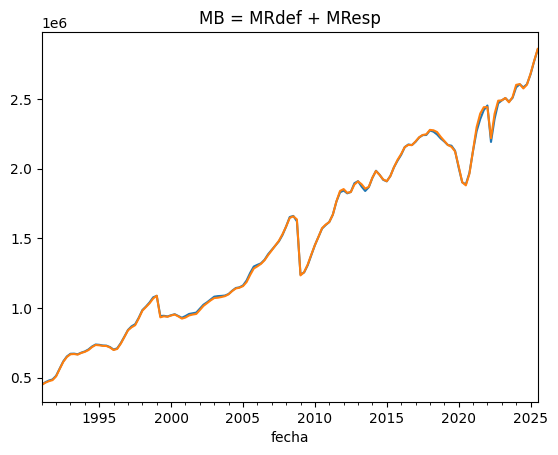

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139 entries, 1991-03-31 to 2025-09-30
Data columns (total 3 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   PIB_Importaciones_Bienes_Servicios_TC  139 non-null    float64
 1   PIB_Importaciones_Bienes_TC            139 non-null    float64
 2   PIB_Importaciones_Servicios_TC         139 non-null    float64
dtypes: float64(3)
memory usage: 4.3 KB


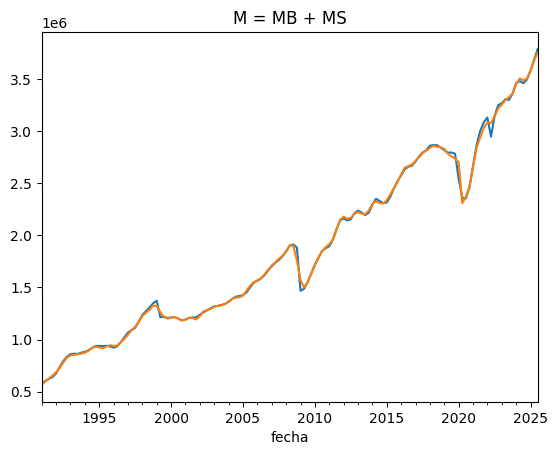

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139 entries, 1991-03-31 to 2025-09-30
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PIB_Exportaciones_Bienes_TC       139 non-null    float64
 1   PIB_Exportacion_Bienes_RegDef_TC  139 non-null    float64
 2   PIB_Exportacion_Bienes_RegEsp_TC  139 non-null    float64
dtypes: float64(3)
memory usage: 4.3 KB


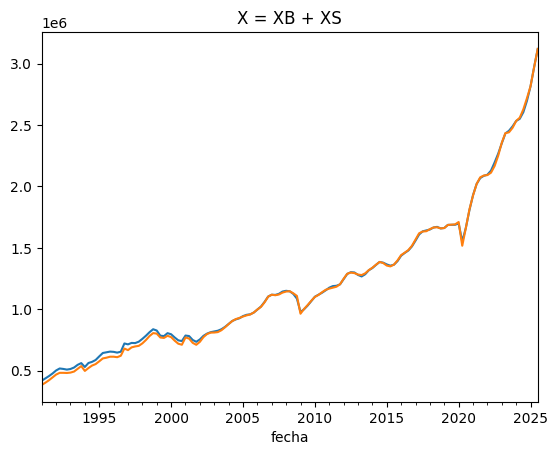

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139 entries, 1991-03-31 to 2025-09-30
Data columns (total 3 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   PIB_Exportaciones_Bienes_Servicios_TC  139 non-null    float64
 1   PIB_Exportaciones_Bienes_TC            139 non-null    float64
 2   PIB_Exportaciones_Servicios_TC         139 non-null    float64
dtypes: float64(3)
memory usage: 4.3 KB


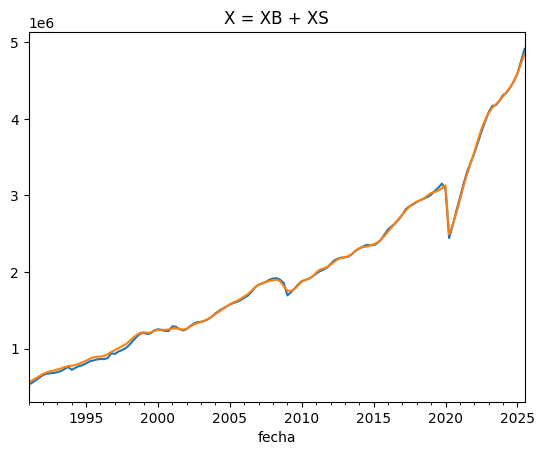

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139 entries, 1991-03-31 to 2025-09-30
Data columns (total 3 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   PIB_Formacion_Bruta_Capital_Fijo_TC  139 non-null    float64
 1   PIB_Maquinaria_Equipo_TC             139 non-null    float64
 2   PIB_Nuevas_Construcciones_TC         139 non-null    float64
dtypes: float64(3)
memory usage: 4.3 KB


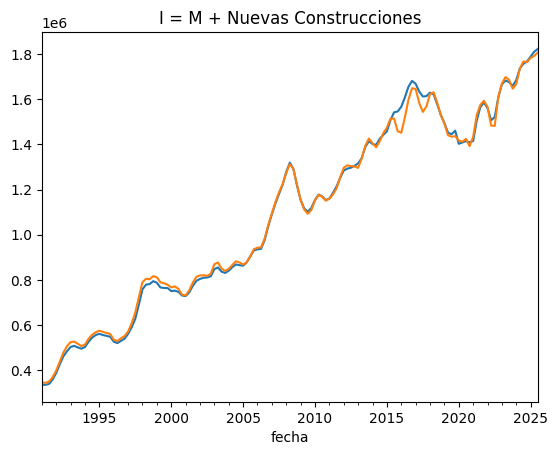

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139 entries, 1991-03-31 to 2025-09-30
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   PIB_Gasto_Consumo_Final_Hogares_TC    139 non-null    float64
 1   PIB_Bienes_Consumo_Duradero_TC        139 non-null    float64
 2   PIB_Bienes_Consumo_Semi_Duraderos_TC  139 non-null    float64
 3   PIB_Bienes_Consumo_No_Duraderos_TC    139 non-null    float64
 4   PIB_Servicios_TC                      139 non-null    float64
dtypes: float64(5)
memory usage: 6.5 KB


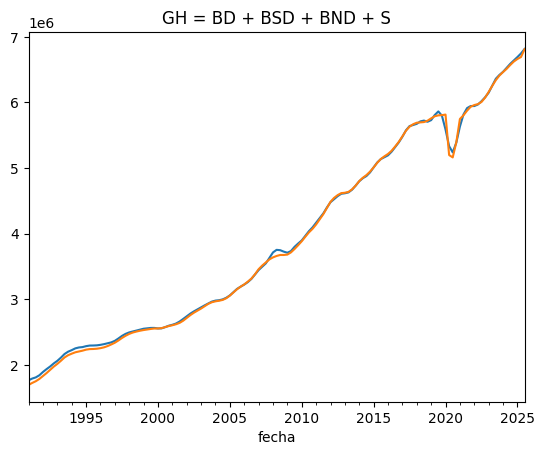

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139 entries, 1991-03-31 to 2025-09-30
Data columns (total 3 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   PIB_Gasto_Consumo_Final_TC                   139 non-null    float64
 1   PIB_Gasto_Consumo_Final_Hogares_TC           139 non-null    float64
 2   PIB_Gasto_Consumo_Final_Gobierno_General_TC  139 non-null    float64
dtypes: float64(3)
memory usage: 4.3 KB


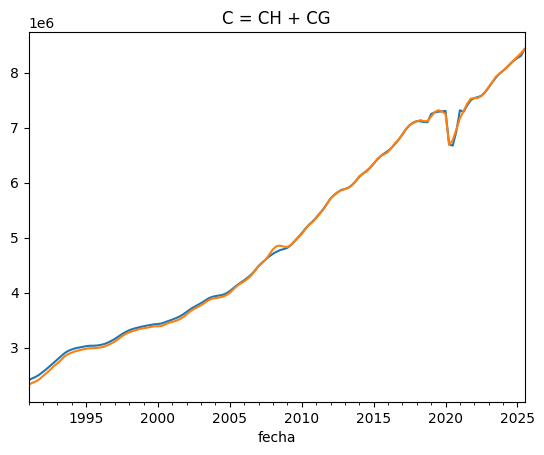

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139 entries, 1991-03-31 to 2025-09-30
Data columns (total 6 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   PIB_TC                                       139 non-null    float64
 1   PIB_Gasto_Consumo_Final_Hogares_TC           139 non-null    float64
 2   PIB_Gasto_Consumo_Final_Gobierno_General_TC  139 non-null    float64
 3   PIB_Formacion_Bruta_Capital_Fijo_TC          139 non-null    float64
 4   PIB_Exportaciones_Bienes_Servicios_TC        139 non-null    float64
 5   PIB_Importaciones_Bienes_Servicios_TC        139 non-null    float64
dtypes: float64(6)
memory usage: 7.6 KB


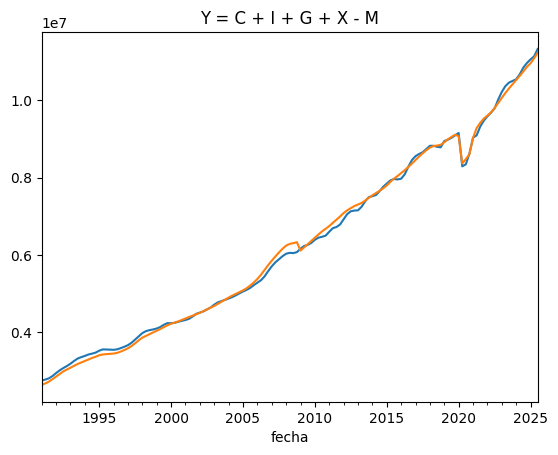

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139 entries, 1991-03-31 to 2025-09-30
Data columns (total 3 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   PIB_Gasto_Consumo_Final_Hogares_TC           139 non-null    float64
 1   PIB_Gasto_Consumo_Final_Gobierno_General_TC  139 non-null    float64
 2   PIB_Formacion_Bruta_Capital_Fijo_TC          139 non-null    float64
dtypes: float64(3)
memory usage: 4.3 KB


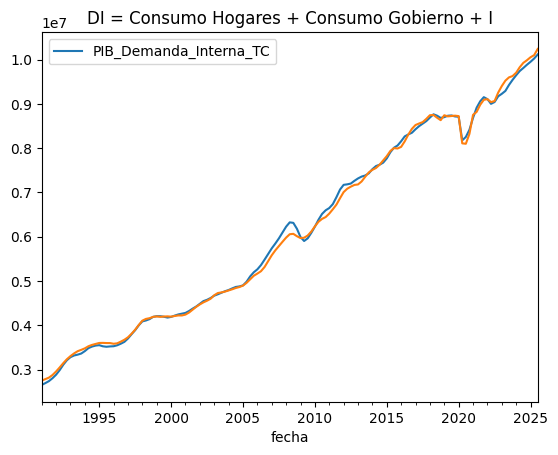

In [7]:
ob_pibv.demanda.get_categorias_principales()['PIB_TC'].plot()
ob_pibv.demanda.get_pib().squeeze().plot()
ob_pibv.oferta.get_pib().squeeze().plot()
plt.title('PIB Objeto Demanda = PIB Objeto Oferta')
plt.show()

#==============================================================================================================
# Validaciones de Oferta
#==============================================================================================================

# PIB = Valor Agregado + Impuestos 
tipo = '_TC'
ob_pibv = PIBViews(quarterly_data_levels_TC, series_type = tipo)
df = ob_pibv.oferta.get_categorias_principales()
df.info()
col_total = 'PIB' + tipo
df_2 = df.drop(col_total, axis = 1)
df_2.sum(axis = 1).plot()
df[col_total].plot()
plt.title('PIB = Valor Agregado + Impuestos')
plt.show()


tipo = '_TC'
ob_pibv = PIBViews(quarterly_data_levels_TC, series_type = tipo)
df1 = ob_pibv.oferta.get_industrias()
df1.sum(axis = 1).plot()
df2 = ob_pibv.oferta.get_valor_agregado().squeeze()
df2.plot()
plt.title('PIB Industrias = Valor Agregado')
plt.show()

tipo = '_TC'
ob_pibv = PIBViews(quarterly_data_levels_TC, series_type = tipo)
df = ob_pibv.oferta.get_industria_ampliada()
df.info()
col_total = 'Industria_Ampliada' + tipo
df_2 = df.drop(col_total, axis = 1)
df_2.sum(axis = 1).plot()
df[col_total].plot()
plt.title('Industrias = Industria Ampliada')
plt.show()

tipo = '_TC'
ob_pibv = PIBViews(quarterly_data_levels_TC, series_type = tipo)
df = ob_pibv.oferta.get_servicios()
df.info()
col_total = 'Servicios' + tipo
df_2 = df.drop(col_total, axis = 1)
df_2.sum(axis = 1).plot()
df[col_total].plot()
plt.title('Actividades Servicios = Servicios')
plt.show()

#==============================================================================================================
# Validaciones de Demanda
#==============================================================================================================


# validación MBRdef = Combustibles + No Combustibles 
tipo = '_TC'
ob_pibv = PIBViews(quarterly_data_levels_TC, series_type = tipo)
df = ob_pibv.demanda.get_importaciones_bienes_regimen_def()
df.info()
col_total = 'PIB_Importacion_Bienes_RegDef' + tipo
df_2 = df.drop(col_total, axis = 1)
df_2.sum(axis = 1).plot()
df[col_total].plot()
plt.title('BRdef = Combustibles + No Combustibles ')
plt.show()



# validación MB = MRdef + MResp 
tipo = '_TC'
ob_pibv = PIBViews(quarterly_data_levels_TC, series_type = tipo)
df = ob_pibv.demanda.get_importaciones_bienes()
df.info()
col_total = 'PIB_Importaciones_Bienes' + tipo
df_2 = df.drop(col_total, axis = 1)
df_2.sum(axis = 1).plot()
df[col_total].plot()
plt.title('MB = MRdef + MResp')
plt.show()


# validación M = MB + MS 
tipo = '_TC'
ob_pibv = PIBViews(quarterly_data_levels_TC, series_type = tipo)
df = ob_pibv.demanda.get_importaciones()
df.info()
col_total = 'PIB_Importaciones_Bienes_Servicios' + tipo
df_2 = df.drop(col_total, axis = 1)
df_2.sum(axis = 1).plot()
df[col_total].plot()
plt.title('M = MB + MS')
plt.show()


# validación XB = XB Rdeg + XS Resp
tipo = '_TC'
ob_pibv = PIBViews(quarterly_data_levels_TC, series_type = tipo)
df = ob_pibv.demanda.get_exportaciones_bienes()
df.info()
col_total = 'PIB_Exportaciones_Bienes' + tipo
df_2 = df.drop(col_total, axis = 1)
df_2.sum(axis = 1).plot()
df[col_total].plot()
plt.title('X = XB + XS')
plt.show()


# validación X = XB + XS
tipo = '_TC'
ob_pibv = PIBViews(quarterly_data_levels_TC, series_type = tipo)
df = ob_pibv.demanda.get_exportaciones()
df.info()
col_total = 'PIB_Exportaciones_Bienes_Servicios' + tipo
df_2 = df.drop(col_total, axis = 1)
df_2.sum(axis = 1).plot()
df[col_total].plot()
plt.title('X = XB + XS')
plt.show()


# validación I = Maquinaria + Nuevas Construcciones
tipo = '_TC'
ob_pibv = PIBViews(quarterly_data_levels_TC, series_type = tipo)
df = ob_pibv.demanda.get_inversion()
df.info()
col_total = 'PIB_Formacion_Bruta_Capital_Fijo' + tipo
df_2 = df.drop(col_total, axis = 1)
df_2.sum(axis = 1).plot()
df[col_total].plot()
plt.title('I = M + Nuevas Construcciones')
plt.show()


# validación CH = BD + BSD + BND + S
tipo = '_TC'
ob_pibv = PIBViews(quarterly_data_levels_TC, series_type = tipo)
df = ob_pibv.demanda.get_consumo_hogares()
df.info()
col_total = 'PIB_Gasto_Consumo_Final_Hogares' + tipo
df_2 = df.drop(col_total, axis = 1)
df_2.sum(axis = 1).plot()
df[col_total].plot()
plt.title('GH = BD + BSD + BND + S')
plt.show()


# validación Consumo Final = C Hogares + C Gobierno
tipo = '_TC'
ob_pibv = PIBViews(quarterly_data_levels_TC, series_type = tipo)
df = ob_pibv.demanda.get_consumo()
df.info()
col_total = 'PIB_Gasto_Consumo_Final' + tipo
df_2 = df.drop(col_total, axis = 1)
df_2.sum(axis = 1).plot()
df[col_total].plot()
plt.title('C = CH + CG')
plt.show()


# validación Y = C + I + G + X - M
tipo = '_TC'
ob_pibv = PIBViews(quarterly_data_levels_TC, series_type = tipo)
df = ob_pibv.demanda.get_categorias_principales()
df.info()
df_2 = df.drop('PIB' + tipo, axis = 1)
df_2['PIB_Importaciones_Bienes_Servicios' + tipo] = -1 * df_2['PIB_Importaciones_Bienes_Servicios' + tipo]
df_2.sum(axis = 1).plot()
df['PIB' + tipo].plot()
plt.title('Y = C + I + G + X - M')
plt.show()


# Validación: Demanda Intera = C + G + I
tipo = '_TC'
df1 = quarterly_data_levels_TC
ob_pibv = PIBViews(df1, series_type = tipo)
df = ob_pibv.demanda.get_demanda_interna()
df.info()
df1.filter(regex = C.DEMANDA_INTERNA + tipo).plot()
df.sum(axis = 1).plot()
plt.title('DI = Consumo Hogares + Consumo Gobierno + I')
plt.show()